In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
print(type(train_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [5]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
print(type(train_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset'>


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 66s 144ms/step - loss: 0.5546 - accuracy: 0.7114 - val_loss: 0.5103 - val_accuracy: 0.7589
Epoch 2/10
391/391 [==============================] - 56s 142ms/step - loss: 0.4422 - accuracy: 0.8102 - val_loss: 0.4428 - val_accuracy: 0.8078
Epoch 3/10
391/391 [==============================] - 58s 146ms/step - loss: 0.3082 - accuracy: 0.8809 - val_loss: 0.3972 - val_accuracy: 0.8473
Epoch 4/10
391/391 [==============================] - 56s 143ms/step - loss: 0.3688 - accuracy: 0.8300 - val_loss: 0.6906 - val_accuracy: 0.5087
Epoch 5/10
391/391 [==============================] - 57s 145ms/step - loss: 0.6035 - accuracy: 0.6739 - val_loss: 0.5131 - val_accuracy: 0.7747
Epoch 6/10
391/391 [==============================] - 57s 143ms/step - loss: 0.2955 - accuracy: 0.8834 - val_loss: 0.4186 - val_accuracy: 0.8147
Epoch 7/10
391/391 [==============================] - 57s 144ms/step - loss: 0.2105 - accuracy: 0.9228 - val_loss: 0.3719 - val_ac

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

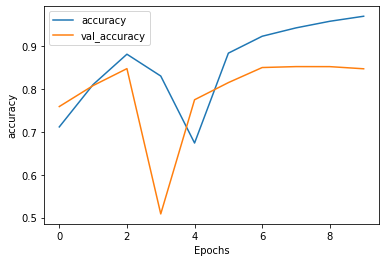

In [13]:
plot_graphs(history, 'accuracy')

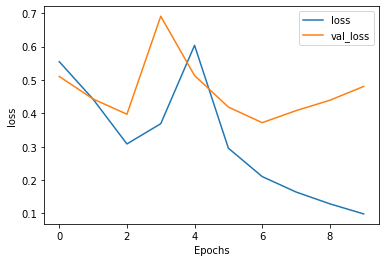

In [14]:
plot_graphs(history, 'loss')